In [2]:
import pickle
import numpy as np
import pandas as pd
import seaborn as sns
sns.set_style("white")
import matplotlib.pyplot as plt
import string
from pickle import dump
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import nltk
from nltk.corpus import stopwords
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
nltk.download('stopwords')
from sklearn.model_selection import cross_val_score
import joblib
import csv


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Fariborz\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [3]:
# Load the dataset
dataset = pd.read_csv('dataset/emails.csv')
dataset.shape

(265, 3)

In [4]:
# Show dataset head (first 5 records)
dataset.head() 

,text,spam,Unnamed: 2
0,Subject: http : / / www . virtu ally - anyw...,1,NaN
1,Subject: [ ilug ] guaranteed to lose 10 - 12 l...,1,NaN
2,Subject: [ ilug ] seeking your partnership de...,1,NaN
3,Subject: 00971 50 2443308 kevin contact me he...,1,NaN
4,"Subject: 10 minutes before sex , lasts for 24 ...",1,NaN


In [5]:
# Show dataset info
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 265 entries, 0 to 264
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   text        265 non-null    object 
 1   spam        265 non-null    int64  
 2   Unnamed: 2  0 non-null      float64
dtypes: float64(1), int64(1), object(1)
memory usage: 6.3+ KB


In [6]:
# Show dataset statistics
dataset.describe()

,spam,Unnamed: 2
count,265.000000,0.0
mean,0.373585,NaN
std,0.484671,NaN
min,0.000000,NaN
25%,0.000000,NaN
50%,0.000000,NaN
75%,1.000000,NaN
max,1.000000,NaN


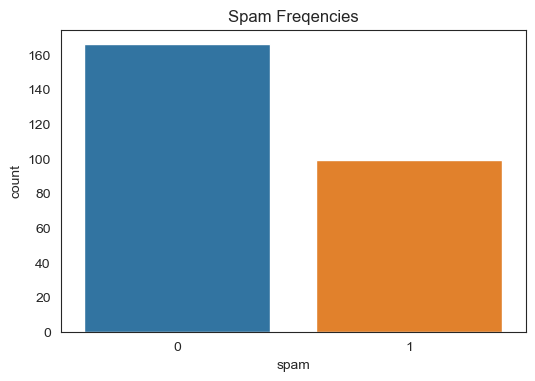

In [7]:
# Visualize spam  frequenices
plt.figure(dpi=100)
sns.countplot(dataset['spam'])
plt.title("Spam Freqencies")
plt.show()

In [8]:
# Check for missing data for each column 
dataset.isnull().sum()

text            0
spam            0
Unnamed: 2    265
dtype: int64

In [9]:
# Check for duplicates and remove them 
dataset.drop_duplicates(inplace=True)

In [10]:
# Cleaning data from punctuation and stopwords and then tokenizing it into words (tokens)
def process(text):
    nopunc = [char for char in text if char not in string.punctuation]
    nopunc = ''.join(nopunc)
    clean = [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]
    return clean

In [11]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(dataset['text'], dataset['spam'], test_size=0.20, random_state=0)

In [12]:
# Fit the CountVectorizer to data
cv = CountVectorizer(analyzer=process)
X_train_cv = cv.fit_transform(X_train)
X_test_cv = cv.transform(X_test)


In [13]:
X_train_cv.shape
X_test_cv.shape

(53, 6996)

In [14]:
# Model creation
model = MultinomialNB()

In [15]:
# Model training
model.fit(X_train_cv, y_train)

MultinomialNB()

In [16]:
# Model predictions on test set
y_pred = model.predict(X_test_cv)

In [17]:
# Model Evaluation | Accuracy
accuracy = accuracy_score(y_test, y_pred)
accuracy * 100

98.11320754716981

In [18]:
# Model Evaluation | Classification report
classification_report(y_test, y_pred)

'              precision    recall  f1-score   support\n\n           0       0.97      1.00      0.99        33\n           1       1.00      0.95      0.97        20\n\n    accuracy                           0.98        53\n   macro avg       0.99      0.97      0.98        53\nweighted avg       0.98      0.98      0.98        53\n'

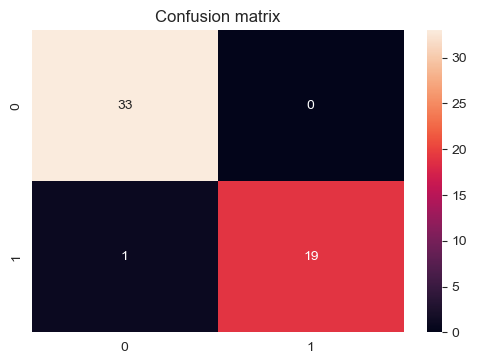

In [19]:
# Model Evaluation | Confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(dpi=100)
sns.heatmap(cm, annot=True)
plt.title("Confusion matrix")
plt.show()

In [20]:
scores = cross_val_score(model, X_test_cv, y_test, cv=5)
scores

array([0.72727273, 0.90909091, 0.81818182, 0.9       , 0.7       ])

In [21]:
joblib.dump(model, 'spam_detection_model.joblib')

['spam_detection_model.joblib']

In [22]:
mnb_loaded = joblib.load('spam_detection_model.joblib')

In [34]:
from flask import Flask, request

app = Flask(__name__)


@app.route('/queryparams', methods=['GET'])
def paramsDemo():
    import csv
    name = request.args.get('name')
    fieldnames = ['text', 'spam']
    with open('filename.csv', mode='w', newline='') as file:
        writer = csv.DictWriter(file, fieldnames=fieldnames)
        writer.writeheader()
    with open('filename.csv', mode='a', newline='') as file:
        writer = csv.DictWriter(file, fieldnames=fieldnames)
        writer.writerow({'text': name, 'spam': 0})
    new_emails = pd.read_csv('filename.csv')
    new_emails_cv = cv.transform(new_emails['text'])
    y_pred_new = mnb_loaded.predict(new_emails_cv)
    print(y_pred_new)
    return str(y_pred_new[0])


if __name__ == '__main__':
    app.run()


 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: off


 * Running on http://127.0.0.1:5000/ (Press CTRL+C to quit)


In [26]:
import csv
fieldnames = ['text', 'spam']
with open('filename.csv', mode='w', newline='') as file:
    writer = csv.DictWriter(file, fieldnames=fieldnames)
    writer.writeheader()
with open('filename.csv', mode='a', newline='') as file:
    writer = csv.DictWriter(file, fieldnames=fieldnames)
    writer.writerow({'text': 'kjhi khiu hi', 'spam': 0})
new_emails = pd.read_csv('filename.csv')
new_emails_cv = cv.transform(new_emails['text'])
y_pred_new = mnb_loaded.predict(new_emails_cv)
print(y_pred_new)



[0]


In [32]:
str(y_pred_new[0])

'0'